This notebook:
1. Preprocesses data if needed and calculates health indices.
2. Integrates the Charlson Comorbidity Index using `charlson_comorbidity.py`.
3. Trains VAE and TabNet models on the full dataset with CCI included (using parameters).
4. Performs analysis (clustering, t-SNE, UMAP) as before.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
from scipy.stats import f_oneway, kruskal, shapiro, levene

# Assuming we run this notebook from the 'project' directory
project_dir = os.path.abspath("..")
data_dir = os.path.join(project_dir, "Data")
sys.path.append(project_dir)

from data_preprocessing import main as preprocess_main
from health_index import main as health_main
from charlson_comorbidity import load_cci_mapping, compute_cci
from vae_model import main as vae_main
from tabnet_model import main as tabnet_main

In [2]:
print(data_dir)

c:\Users\imran\Documents\VITAI\Data


### 1. Preprocess and Health Index if not done

In [3]:
if not os.path.exists(os.path.join(data_dir, 'patient_data_sequences.pkl')):
    preprocess_main()

if not os.path.exists(os.path.join(data_dir, 'patient_data_with_health_index.pkl')):
    health_main()

### 2. Compute CCI

In [4]:
conditions = pd.read_csv(os.path.join(data_dir, 'conditions.csv'), usecols=['PATIENT','CODE','DESCRIPTION'])

cci_mapping = load_cci_mapping(data_dir)  # Load from Data/
patient_cci = compute_cci(conditions, cci_mapping)

patient_data = pd.read_pickle(os.path.join(data_dir,'patient_data_with_health_index.pkl'))
patient_data = patient_data.merge(patient_cci, how='left', left_on='Id', right_on='PATIENT')
patient_data.drop(columns='PATIENT', inplace=True)
patient_data['CharlsonIndex'] = patient_data['CharlsonIndex'].fillna(0)

cci_output_path=os.path.join(data_dir,'patient_data_with_health_index_cci.pkl')
patient_data.to_pickle(cci_output_path)

### 3. Train Models with CCI - just pass the parameter to main

In [5]:
vae_main(input_file='patient_data_with_health_index_cci.pkl')
tabnet_main(input_file='patient_data_with_health_index_cci.pkl')

INFO:vae_model:Data prepared for VAE.
INFO:vae_model:VAE model built.


Epoch 1/100
357/366 [============================>.] - ETA: 0s - loss: 0.2855WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 4ms/step - loss: 0.2844 - val_loss: 0.2387
Epoch 2/100
358/366 [============================>.] - ETA: 0s - loss: 0.2275WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 1s 4ms/step - loss: 0.2274 - val_loss: 0.2200
Epoch 3/100
364/366 [============================>.] - ETA: 0s - loss: 0.2174WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 4ms/step - loss: 0.2173 - val_loss: 0.2144
Epoch 4/100
366/366 [==============================] - ETA: 0s - loss: 0.2122WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 4ms/step - loss: 0.2122 - val_loss: 0.2114
Epoch 5/100
357/366 [============================>.] - ETA: 0s - loss: 0.2102WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 4ms/step - loss: 0.2104 - val_loss: 0.2096
Epoch 6/100
357/366 [============================>.] - ETA: 0s - loss: 0.2090WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 4ms/step - loss: 0.2089 - val_loss: 0.2084
Epoch 7/100
364/366 [============================>.] - ETA: 0s - loss: 0.2066WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 5ms/step - loss: 0.2066 - val_loss: 0.2079
Epoch 8/100
357/366 [============================>.] - ETA: 0s - loss: 0.2066WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 5ms/step - loss: 0.2065 - val_loss: 0.2063
Epoch 9/100
359/366 [============================>.] - ETA: 0s - loss: 0.2056WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 5ms/step - loss: 0.2057 - val_loss: 0.2056
Epoch 10/100
355/366 [============================>.] - ETA: 0s - loss: 0.2052WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 5ms/step - loss: 0.2054 - val_loss: 0.2044
Epoch 11/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2048 - val_loss: 0.2054
Epoch 12/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2047 - val_loss: 0.2049
Epoch 13/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2040 - val_loss: 0.2047
Epoch 14/100
356/366 [============================>.] - ETA: 0s - loss: 0.2037WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 5ms/step - loss: 0.2035 - val_loss: 0.2030
Epoch 15/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2033 - val_loss: 0.2090
Epoch 16/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2030 - val_loss: 0.2057
Epoch 17/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2030 - val_loss: 0.2033
Epoch 18/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2025 - val_loss: 0.2033
Epoch 19/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2025 - val_loss: 0.2047
Epoch 20/100
362/366 [============================>.] - ETA: 0s - loss: 0.2024WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 5ms/step - loss: 0.2025 - val_loss: 0.2016
Epoch 21/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2018 - val_loss: 0.2022
Epoch 22/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2018 - val_loss: 0.2021
Epoch 23/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2015 - val_loss: 0.2028
Epoch 24/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2012 - val_loss: 0.2022
Epoch 25/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2010 - val_loss: 0.2019
Epoch 26/100
366/366 [==============================] - 2s 4ms/step - loss: 0.2017 - val_loss: 0.2026
Epoch 27/100
364/366 [============================>.] - ETA: 0s - loss: 0.2008WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is 

366/366 [==============================] - 2s 5ms/step - loss: 0.2008 - val_loss: 0.2007
Epoch 28/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2013 - val_loss: 0.2011
Epoch 29/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2004 - val_loss: 0.2020
Epoch 30/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2006 - val_loss: 0.2016
Epoch 31/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2007 - val_loss: 0.2014
Epoch 32/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2006 - val_loss: 0.2008
Epoch 33/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2006 - val_loss: 0.2020
Epoch 34/100
359/366 [============================>.] - ETA: 0s - loss: 0.2004WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is 

366/366 [==============================] - 2s 5ms/step - loss: 0.2004 - val_loss: 0.2000
Epoch 35/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2004 - val_loss: 0.2013
Epoch 36/100
366/366 [==============================] - 2s 5ms/step - loss: 0.1999 - val_loss: 0.2014
Epoch 37/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2003 - val_loss: 0.2015
Epoch 38/100
356/366 [============================>.] - ETA: 0s - loss: 0.2001WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 5ms/step - loss: 0.2000 - val_loss: 0.1999
Epoch 39/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2001 - val_loss: 0.2019
Epoch 40/100
366/366 [==============================] - 2s 5ms/step - loss: 0.2002 - val_loss: 0.2000
Epoch 41/100
355/366 [============================>.] - ETA: 0s - loss: 0.2000WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 5ms/step - loss: 0.2000 - val_loss: 0.1997
Epoch 42/100
366/366 [==============================] - 2s 5ms/step - loss: 0.1999 - val_loss: 0.2009
Epoch 43/100
366/366 [==============================] - 2s 5ms/step - loss: 0.1995 - val_loss: 0.2027
Epoch 44/100
364/366 [============================>.] - ETA: 0s - loss: 0.2001WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 5ms/step - loss: 0.2001 - val_loss: 0.1994
Epoch 45/100
366/366 [==============================] - 2s 5ms/step - loss: 0.1997 - val_loss: 0.1998
Epoch 46/100
359/366 [============================>.] - ETA: 0s - loss: 0.1994WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


366/366 [==============================] - 2s 5ms/step - loss: 0.1995 - val_loss: 0.1989
Epoch 47/100
366/366 [==============================] - 2s 5ms/step - loss: 0.1990 - val_loss: 0.2000
Epoch 48/100
366/366 [==============================] - 2s 5ms/step - loss: 0.1996 - val_loss: 0.2023
Epoch 49/100
366/366 [==============================] - 3s 9ms/step - loss: 0.1997 - val_loss: 0.2001
Epoch 50/100
366/366 [==============================] - 4s 11ms/step - loss: 0.1995 - val_loss: 0.1995
Epoch 51/100
366/366 [==============================] - 4s 12ms/step - loss: 0.1994 - val_loss: 0.2012
Epoch 52/100
366/366 [==============================] - 4s 10ms/step - loss: 0.1992 - val_loss: 0.1993
Epoch 53/100
366/366 [==============================] - 4s 11ms/step - loss: 0.1991 - val_loss: 0.2006
Epoch 54/100
366/366 [==============================] - 4s 11ms/step - loss: 0.1990 - val_loss: 0.1999
Epoch 55/100
366/366 [==============================] - 4s 10ms/step - loss: 0.1993 - val_

INFO:tensorflow:Assets written to: vae_model\assets


INFO:tensorflow:Assets written to: vae_model\assets
INFO:vae_model:VAE trained and saved.


INFO:tensorflow:Assets written to: vae_encoder\assets


INFO:tensorflow:Assets written to: vae_encoder\assets


INFO:tensorflow:Assets written to: vae_decoder\assets


INFO:tensorflow:Assets written to: vae_decoder\assets


3652/3652 [==============================] - 6s 2ms/step


INFO:vae_model:Latent features saved.
INFO:tabnet_model:Patient data loaded.
INFO:tabnet_model:Data prepared for TabNet.
[I 2024-12-18 15:03:37,912] A new study created in memory with name: no-name-e5e924f4-9a82-4bf7-a090-b5bb7bf91708


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.80947


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.88338


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.76532


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-18 15:06:45,009] Trial 0 finished with value: 0.6737706830631435 and parameters: {'n_d': 10, 'n_a': 19, 'n_steps': 7, 'gamma': 1.6182189055989675, 'lambda_sparse': 0.0008180540615557291, 'lr': 0.00012962302073129633, 'cat_emb_dim': 2, 'n_shared': 3, 'n_independent': 1}. Best is trial 0 with value: 0.6737706830631435.



Early stopping occurred at epoch 47 with best_epoch = 37 and best_val_0_rmse = 0.4852


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.38479


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.41327


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-18 15:09:12,885] Trial 1 finished with value: 0.18475873311306254 and parameters: {'n_d': 51, 'n_a': 36, 'n_steps': 4, 'gamma': 1.4488956335559355, 'lambda_sparse': 0.00010545004060936062, 'lr': 0.0001409047293650375, 'cat_emb_dim': 1, 'n_shared': 2, 'n_independent': 3}. Best is trial 1 with value: 0.18475873311306254.


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.32557


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_val_0_rmse = 0.34735


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.35333


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-18 15:12:00,208] Trial 2 finished with value: 0.11716123983326514 and parameters: {'n_d': 29, 'n_a': 49, 'n_steps': 4, 'gamma': 1.3550810231577233, 'lambda_sparse': 0.00018927630543484663, 'lr': 0.000147518178613884, 'cat_emb_dim': 1, 'n_shared': 2, 'n_independent': 4}. Best is trial 2 with value: 0.11716123983326514.
[W 2024-12-18 15:12:30,404] Trial 3 failed with parameters: {'n_d': 51, 'n_a': 36, 'n_steps': 4, 'gamma': 1.7074752453517, 'lambda_sparse': 9.378991107358241e-05, 'lr': 0.0003233129036659302, 'cat_emb_dim': 3, 'n_shared': 1, 'n_independent': 4} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial

KeyboardInterrupt: 

### 4. Analysis

In [ ]:
# Load latent features and predictions
latent_features = pd.read_csv('latent_features_vae.csv')
tabnet_predictions = pd.read_csv('tabnet_predictions.csv')
data_merged = latent_features.merge(tabnet_predictions,on='Id',how='inner')

X = data_merged.drop(columns=['Id','Predicted_Health_Index'])
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

cluster_range=range(2,10)
sil_kmeans=[]
for n in cluster_range:
    km=KMeans(n_clusters=n,random_state=42)
    labels=km.fit_predict(X_scaled)
    sil_kmeans.append(silhouette_score(X_scaled, labels))

optimal_k = cluster_range[np.argmax(sil_kmeans)]
kmeans=KMeans(n_clusters=optimal_k,random_state=42).fit(X_scaled)
kmeans_labels=kmeans.labels_

sil_agg=[]
for n in cluster_range:
    agg=AgglomerativeClustering(n_clusters=n)
    labels=agg.fit_predict(X_scaled)
    sil_agg.append(silhouette_score(X_scaled,labels))

optimal_agg=cluster_range[np.argmax(sil_agg)]
agg=AgglomerativeClustering(n_clusters=optimal_agg)
agg_labels=agg.fit_predict(X_scaled)

neighbors=5
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors(n_neighbors=neighbors).fit(X_scaled)
distances,indices=nbrs.kneighbors(X_scaled)
distances=np.sort(distances[:,neighbors-1],axis=0)
epsilon=distances[int(0.9*len(distances))]
db=DBSCAN(eps=epsilon,min_samples=5).fit(X_scaled)
dbscan_labels=db.labels_

def cluster_scores(X,labels):
    if len(set(labels))>1:
        sil=silhouette_score(X,labels)
        ch=calinski_harabasz_score(X,labels)
        db=davies_bouldin_score(X,labels)
    else:
        sil=ch=db=np.nan
    return sil,ch,db

sil_km,ch_km,db_km=cluster_scores(X_scaled,kmeans_labels)
sil_a,ch_a,db_a=cluster_scores(X_scaled,agg_labels)
if len(set(dbscan_labels))>1:
    sil_db,ch_db,db_db=cluster_scores(X_scaled,dbscan_labels)
else:
    sil_db=ch_db=db_db=np.nan

validation_df=pd.DataFrame({
    'Method':['KMeans','Agglomerative','DBSCAN'],
    'Silhouette':[sil_km,sil_a,sil_db],
    'CH':[ch_km,ch_a,ch_db],
    'DB':[db_km,db_a,db_db]
})
validation_df['Sil_rank']=validation_df['Silhouette'].rank(ascending=False)
validation_df['CH_rank']=validation_df['CH'].rank(ascending=False)
validation_df['DB_rank']=validation_df['DB'].rank(ascending=True)
validation_df['Avg_rank']=validation_df[['Sil_rank','CH_rank','DB_rank']].mean(axis=1)

# Function to count clusters (excluding noise for DBSCAN)
def get_n_clusters(labels):
    unique_lbls = set(labels)
    # If DBSCAN includes noise (-1), exclude it
    if -1 in unique_lbls:
        unique_lbls.remove(-1)
    return len(unique_lbls)

kmeans_n = get_n_clusters(kmeans_labels)
agg_n = get_n_clusters(agg_labels)
dbscan_n = get_n_clusters(dbscan_labels)

validation_df['n_clusters'] = [kmeans_n, agg_n, dbscan_n]

# Rank by n_clusters descending (more clusters = better)
validation_df['Cluster_rank'] = validation_df['n_clusters'].rank(ascending=False)

# Combine cluster preference
# Adjust weight to control how much cluster count influences the final selection.
# Positive weight means more clusters reduces the final rank (i.e. better).
weight = 0.5
validation_df['New_Avg_rank'] = validation_df['Avg_rank'] - weight*validation_df['Cluster_rank'].rank(ascending=True)

best_method=validation_df.loc[validation_df['New_Avg_rank'].idxmin(),'Method']

if best_method=='KMeans':
    final_labels=kmeans_labels
elif best_method=='Agglomerative':
    final_labels=agg_labels
else:
    final_labels=dbscan_labels

data_merged['Cluster']=final_labels
cluster_map=data_merged.groupby('Cluster')['Predicted_Health_Index'].mean().sort_values().reset_index()
cluster_map['Severity_Index']=range(1,len(cluster_map)+1)
mapping=cluster_map.set_index('Cluster')['Severity_Index'].to_dict()
data_merged['Severity_Index']=data_merged['Cluster'].map(mapping)

tsne=TSNE(n_components=2,random_state=42)
tsne_results=tsne.fit_transform(X_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1],hue=data_merged['Severity_Index'],palette='viridis')
plt.title(f't-SNE visualization ({best_method})')
plt.show()

reducer=umap.UMAP(n_components=2,random_state=42)
umap_results=reducer.fit_transform(X_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=umap_results[:,0],y=umap_results[:,1],hue=data_merged['Severity_Index'],palette='viridis')
plt.title(f'UMAP visualization ({best_method})')
plt.show()

clusters=data_merged['Cluster'].unique()
normality_pvals=[]
for c in clusters:
    grp=data_merged[data_merged['Cluster']==c]['Predicted_Health_Index']
    stat,p=shapiro(grp)
    normality_pvals.append(p)

if any(p<0.05 for p in normality_pvals):
    groups=[data_merged[data_merged['Cluster']==c]['Predicted_Health_Index'] for c in clusters]
    kw_stat,kw_p=kruskal(*groups)
    print(f"Kruskal-Wallis: H={kw_stat}, p={kw_p}")
else:
    groups=[data_merged[data_merged['Cluster']==c]['Predicted_Health_Index'] for c in clusters]
    lv_stat,lv_p=levene(*groups)
    if lv_p<0.05:
        kw_stat,kw_p=kruskal(*groups)
        print(f"Kruskal-Wallis: H={kw_stat}, p={kw_p}")
    else:
        f_stat,f_p=f_oneway(*groups)
        print(f"ANOVA: F={f_stat}, p={f_p}")

print("Analysis complete. Full dataset with CCI integrated.")

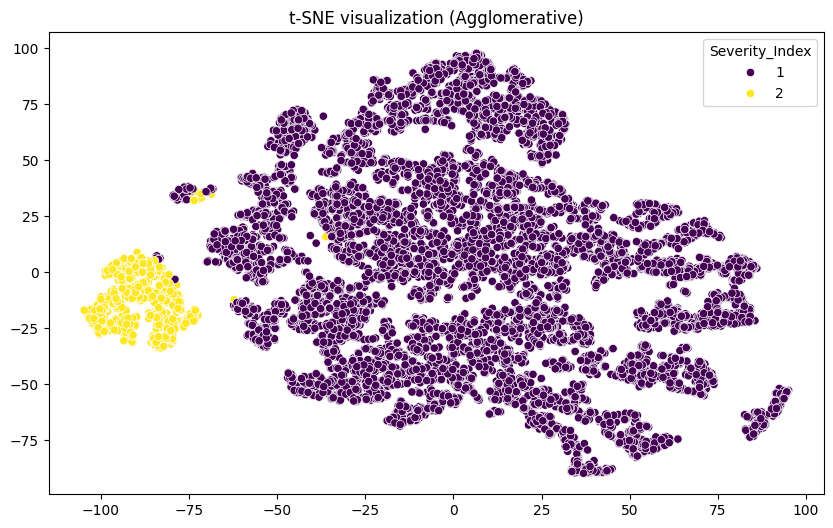

c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


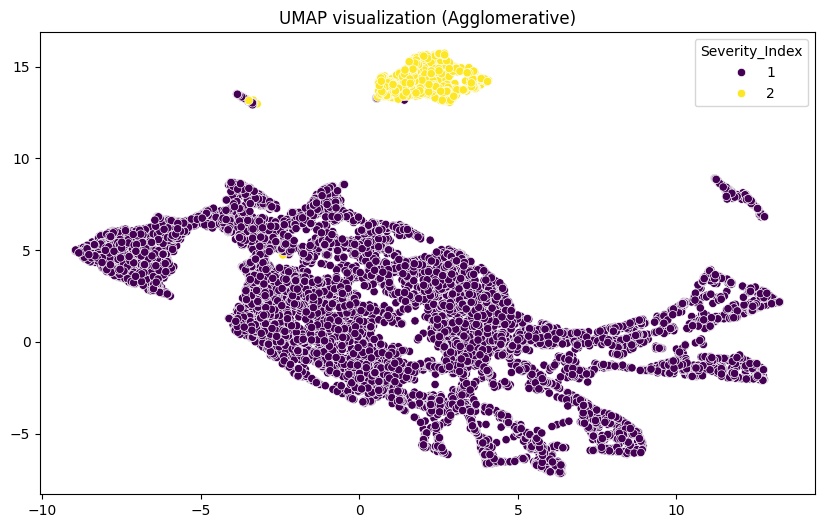

Kruskal-Wallis: H=0.0017965008520591864, p=0.966191667126417
Analysis complete. Full dataset with CCI integrated.


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10851.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
# latent_features = pd.read_csv('latent_features_vae.csv')
# tabnet_predictions = pd.read_csv('tabnet_predictions.csv')
# data_merged = latent_features.merge(tabnet_predictions,on='Id',how='inner')

# X = data_merged.drop(columns=['Id','Predicted_Health_Index'])
# scaler = StandardScaler()
# X_scaled=scaler.fit_transform(X)

# cluster_range=range(2,10)
# sil_kmeans=[]
# for n in cluster_range:
#     km=KMeans(n_clusters=n,random_state=42)
#     labels=km.fit_predict(X_scaled)
#     sil_kmeans.append(silhouette_score(X_scaled, labels))
# # 
# optimal_k = cluster_range[np.argmax(sil_kmeans)]
# kmeans=KMeans(n_clusters=optimal_k,random_state=42).fit(X_scaled)
# kmeans_labels=kmeans.labels_

# sil_agg=[]
# for n in cluster_range:
#     agg=AgglomerativeClustering(n_clusters=n)
#     labels=agg.fit_predict(X_scaled)
#     sil_agg.append(silhouette_score(X_scaled,labels))
# optimal_agg=cluster_range[np.argmax(sil_agg)]
# agg=AgglomerativeClustering(n_clusters=optimal_agg)
# agg_labels=agg.fit_predict(X_scaled)

# neighbors=5
# from sklearn.neighbors import NearestNeighbors
# nbrs=NearestNeighbors(n_neighbors=neighbors).fit(X_scaled)
# distances,indices=nbrs.kneighbors(X_scaled)
# distances=np.sort(distances[:,neighbors-1],axis=0)
# epsilon=distances[int(0.9*len(distances))]
# db=DBSCAN(eps=epsilon,min_samples=5).fit(X_scaled)
# dbscan_labels=db.labels_

# def cluster_scores(X,labels):
#     if len(set(labels))>1:
#         sil=silhouette_score(X,labels)
#         ch=calinski_harabasz_score(X,labels)
#         db=davies_bouldin_score(X,labels)
#     else:
#         sil=ch=db=np.nan
#     return sil,ch,db

# sil_km,ch_km,db_km=cluster_scores(X_scaled,kmeans_labels)
# sil_a,ch_a,db_a=cluster_scores(X_scaled,agg_labels)
# if len(set(dbscan_labels))>1:
#     sil_db,ch_db,db_db=cluster_scores(X_scaled,dbscan_labels)
# else:
#     sil_db=ch_db=db_db=np.nan

# validation_df=pd.DataFrame({
#     'Method':['KMeans','Agglomerative','DBSCAN'],
#     'Silhouette':[sil_km,sil_a,sil_db],
#     'CH':[ch_km,ch_a,ch_db],
#     'DB':[db_km,db_a,db_db]
# })
# validation_df['Sil_rank']=validation_df['Silhouette'].rank(ascending=False)
# validation_df['CH_rank']=validation_df['CH'].rank(ascending=False)
# validation_df['DB_rank']=validation_df['DB'].rank(ascending=True)
# validation_df['Avg_rank']=validation_df[['Sil_rank','CH_rank','DB_rank']].mean(axis=1)
# best_method=validation_df.loc[validation_df['Avg_rank'].idxmin(),'Method']

# if best_method=='KMeans':
#     final_labels=kmeans_labels
# elif best_method=='Agglomerative':
#     final_labels=agg_labels
# else:
#     final_labels=dbscan_labels

# data_merged['Cluster']=final_labels
# cluster_map=data_merged.groupby('Cluster')['Predicted_Health_Index'].mean().sort_values().reset_index()
# cluster_map['Severity_Index']=range(1,len(cluster_map)+1)
# mapping=cluster_map.set_index('Cluster')['Severity_Index'].to_dict()
# data_merged['Severity_Index']=data_merged['Cluster'].map(mapping)

# tsne=TSNE(n_components=2,random_state=42)
# tsne_results=tsne.fit_transform(X_scaled)
# plt.figure(figsize=(10,6))
# sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1],hue=data_merged['Severity_Index'],palette='viridis')
# plt.title(f't-SNE visualization ({best_method})')
# plt.show()

# reducer=umap.UMAP(n_components=2,random_state=42)
# umap_results=reducer.fit_transform(X_scaled)
# plt.figure(figsize=(10,6))
# sns.scatterplot(x=umap_results[:,0],y=umap_results[:,1],hue=data_merged['Severity_Index'],palette='viridis')
# plt.title(f'UMAP visualization ({best_method})')
# plt.show()

# clusters=data_merged['Cluster'].unique()
# normality_pvals=[]
# for c in clusters:
#     grp=data_merged[data_merged['Cluster']==c]['Predicted_Health_Index']
#     stat,p=shapiro(grp)
#     normality_pvals.append(p)

# if any(p<0.05 for p in normality_pvals):
#     groups=[data_merged[data_merged['Cluster']==c]['Predicted_Health_Index'] for c in clusters]
#     kw_stat,kw_p=kruskal(*groups)
#     print(f"Kruskal-Wallis: H={kw_stat}, p={kw_p}")
# else:
#     groups=[data_merged[data_merged['Cluster']==c]['Predicted_Health_Index'] for c in clusters]
#     lv_stat,lv_p=levene(*groups)
#     if lv_p<0.05:
#         kw_stat,kw_p=kruskal(*groups)
#         print(f"Kruskal-Wallis: H={kw_stat}, p={kw_p}")
#     else:
#         f_stat,f_p=f_oneway(*groups)
#         print(f"ANOVA: F={f_stat}, p={f_p}")

# print("Analysis complete. Full dataset with CCI integrated.")